## Supervised learning:



###Feature extraction and pre-processing

When working with signals, it is quite possible for some noise to be added in the signal. To remove this noise, we employ low_pass filters. This method works because the random noise is usually very high-frequency

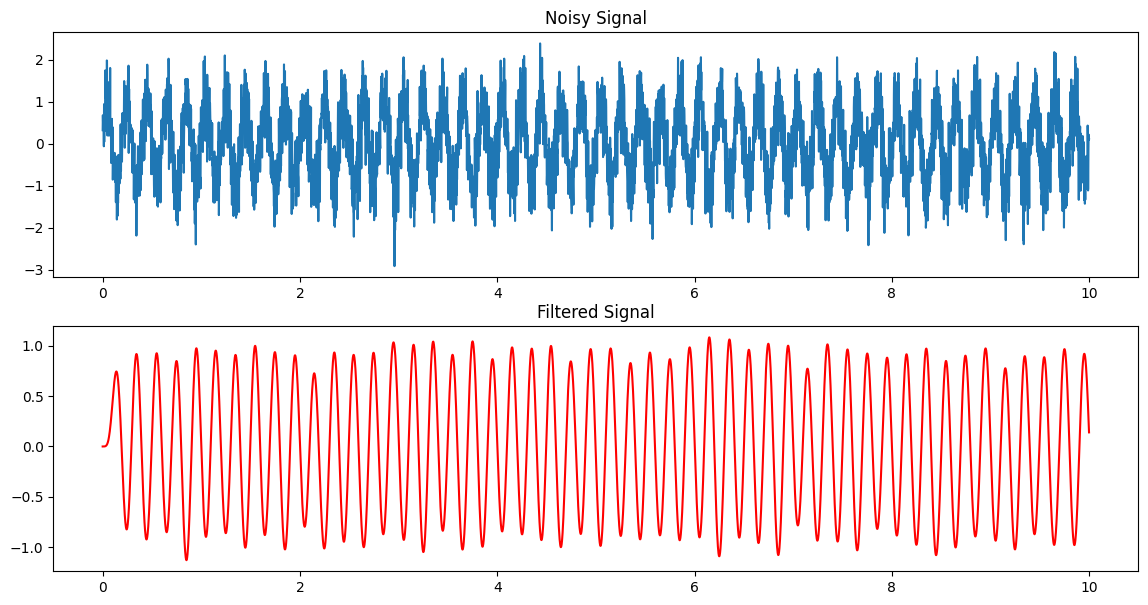

In [1]:
import numpy as np
from scipy.signal import butter, lfilter

# Generate a sample signal
fs = 500  # Sample frequency (Hz)
t = np.arange(0, 10, 1/fs)  # Time vector
f = 5  # Frequency of the signal
signal = np.sin(2*np.pi*f*t)  # Sine wave

# Add noise
noise = np.random.normal(0, 0.5, signal.shape)
noisy_signal = signal + noise

# Design a Butterworth filter
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Apply the filter
cutoff = 6  # Desired cutoff frequency of the filter, Hz
filtered_signal = lowpass_filter(noisy_signal, cutoff, fs)

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.title('Noisy Signal')
plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal, label='Filtered Signal', color='red')
plt.title('Filtered Signal')
plt.show()


### Linear Regression

To showcase the linear regression algorithm, we will use the example of house prices dataset. Given attributes of the house (Such as house age, number of rooms, etc.), we need to predict the price of the house.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
# Load dataset
housing = fetch_california_housing()
features=housing.feature_names
X = housing.data
y = housing.target
print(features)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Mean Squared Error: 0.5305677824766757


### Classification

To exhibit the classification algorithms, we will use the Iris dataset. First we will explore the Iris dataset, then we will use 4 different algorithms to perform classification task on this dataset. The algorithms are:
1. k-Nearest Neighbours
2. Naive Bayes
3. Random Forests
4. Support Vector Machine

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame with the data
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Display the first few rows of the dataframe
print("Sample of the Iris dataset:")
print(df.head())

# Summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(df.describe())

# Class distribution
print("\nClass distribution:")
print(df['target'].value_counts())

# Pairplot to visualize relationships between features
sns.pairplot(df, hue='target', diag_kind='hist')
plt.suptitle("Pairplot of Iris Dataset Features")
plt.show()

# Boxplot to visualize feature distributions by class
plt.figure(figsize=(10, 6))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f"{feature} distribution by class")
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Iris Dataset Features")
plt.show()


K-nearest Neighbours algorithm

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

Naive Bayes Algorithm

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict and evaluate
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))


Random Forests algorithm

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


Support vector Machines

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))


## Unsupervised Learning

### Dimensionality Reduction: Principal Component Analysis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

# Generate synthetic high-dimensional data with 50 features
X, _ = make_classification(n_samples=1000, n_features=50, n_informative=10, random_state=0)

# Apply PCA for dimensionality reduction to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting original data and PCA-reduced data
plt.figure(figsize=(12, 6))

# Plot original high-dimensional data
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.title('Original High-Dimensional Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot PCA-reduced data
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

# Print explained variance ratio of the principal components
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


#### Explanation:


Step 1: make_classification: Generates synthetic data with specified features (n_features=50) and informative features (n_informative=10).


Step 2: PCA(n_components=2): Initializes PCA to reduce data to 2 principal components.


Step 3: fit_transform(X): Fits PCA to data X and transforms it to the reduced dimensionality space.


Step 4: Plotting:

Subplot 1: Displays original high-dimensional data.

Subplot 2: Displays PCA-reduced data.


Step 5: explained_variance_ratio_: Prints the ratio of variance explained by each of the principal components.


### Clustering: K-means clustering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic widely distributed data with 4 clusters and varied standard deviation
X, _ = make_blobs(n_samples=1000, centers=4, cluster_std=[1.0, 2.5, 0.5, 3.0], random_state=42)

# Apply K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X)

# Plotting original data and K-means clusters
plt.figure(figsize=(8, 6))

# Plot original data points in gray
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.5, label='Original Data')

# Plot K-means clusters in different colors, with cluster centers marked in red squares
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', alpha=0.7, label='K-means Clusters')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='s', s=200, c='red', label='Cluster Centers')

plt.title('K-means Clustering of Widely Distributed Signal')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


#### Explanation

Step 1: make_blobs: Generates synthetic data with 4 clusters (centers=4) and varying standard deviation (cluster_std).

Step 2: KMeans(n_clusters=4): Initializes K-means with 4 clusters.

Step 3: fit_predict(X): Fits K-means to data X and predicts cluster labels for each data point.

Step 4: Plotting:

Original Data: Scatter plot of original data points in gray.

K-means Clusters: Scatter plot of data points colored by their predicted
cluster labels (y_pred), with cluster centers marked in red squares.
